In [37]:
import numpy as np

from QAOA.qaoa_src.Ansatz import *
import scipy as sc
from qiskit.visualization import plot_histogram

In [38]:
# Generating random graph 
n = 3
rng_seed = int(np.random.randint(0,2**31-1))
np.random.seed(rng_seed)
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
edge_list = generate_random_graph(nodes=n,weighted=True,w_min=1e-2,seed=rng_seed)

# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(edge_list)


Best solution = [1 0 0] cost = -1.373


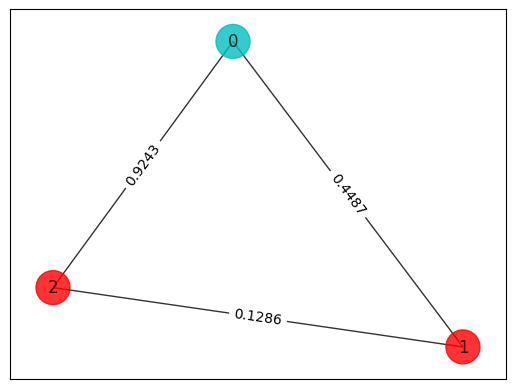

In [39]:
# Calculating optimal partition and plotting
best_cost, best_perm = qubo_min_cost_partition(nr_nodes=n,Q_mat=get_qubo(size=n,edges=edge_list))
colors = ["r" if best_perm[i] == 0 else "c" for i in range(n)]
print("\nBest solution = " + str(best_perm) + " cost = " + str(best_cost))
pos = nx.spring_layout(G)
draw_graph(G, colors, pos)


In [40]:
# Defining instance of QAOA ansatz
QAOA_objective = QAOAansatz(n_qubits=n,w_edges=edge_list, backend="SYMQ", precision=64)

In [57]:
# Number of repetitions of (cost, mixer) in circuit
layers=2

# Initial guess for parameters (beta, gamma) of circuit
theta_i = np.zeros(2*layers)

# Optimizer run
_available_methods_ = ['Nelder-Mead', 'Powell', 'COBYLA', 'trust-constr']
res = sc.optimize.minimize(fun=QAOA_objective.evaluate_circuit, x0=theta_i,method=_available_methods_[1])

# Final parameters (beta, gamma) for circuit
theta_f = res.x.tolist()

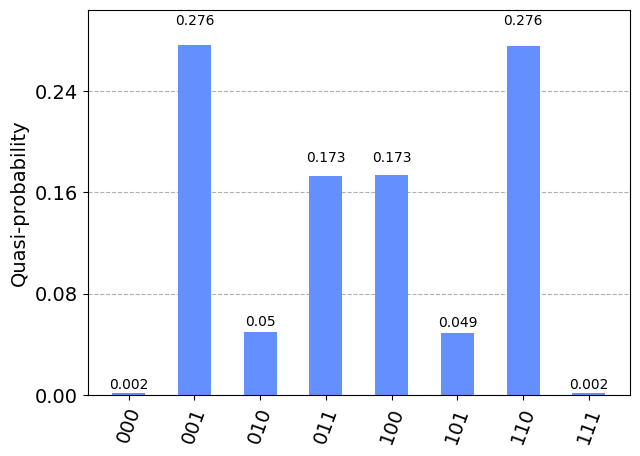

In [58]:
plot_histogram(QAOA_objective.set_circuit(theta=theta_f).get_state_probabilities())